# Scatterplot Over-draw

### Imports and Setup

In [1]:
# Third party
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import matplotlib_inline

import numpy as np
import pandas as pd
import pickle 
from scipy.stats import gaussian_kde
import seaborn as sns

# Local files
import flexibleSubsetSelection as fss

# Initialize notebook settings
sns.set_theme() # set seaborn theme
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
%matplotlib inline 
%load_ext autoreload
%autoreload 2

### Load Dataset

In [3]:
saveDirectory = "Fig5-scatterPlotOverdraw" # data directory for this notebook
loadDirectory = "../data/exampleDatasets/chessOpenings.csv"

# load dataset from csv
df = pd.read_csv(loadDirectory, index_col=0)

# apply dictionary for mapping
mapping = {'A': 'Flank', 'B': 'Semi-Open', 'C': 'Open & French Defense',
               'D': 'Closed & Semi-Closed', 'E': 'Indian Defenses'}
df['ECO'] = df['ECO'].str[0].map(mapping)

# drop unused columns
dropCols = ["Last Played", "Moves", "moves_list", "move1w", "move1b", "move2b", 
            "move2w", "move3w", "move3b", "move4w", "move4b", "Colour", 
            "Perf Rating", "Avg Player", "White_win%", "Opponent Win %", 
            "Black_win%", "White_odds", "White_Wins", "Draw %", "Black_Wins"]
df.drop(inplace=True, columns=dropCols)

# create dataset
features = ["Player Win %", "Num Games"]
dataset = fss.Dataset(name="Chess Openings", data=df, features=features)

### Plot Dataset

ValueError: Could not interpret value `Player Win %` for `x`. An entry with this name does not appear in `data`.

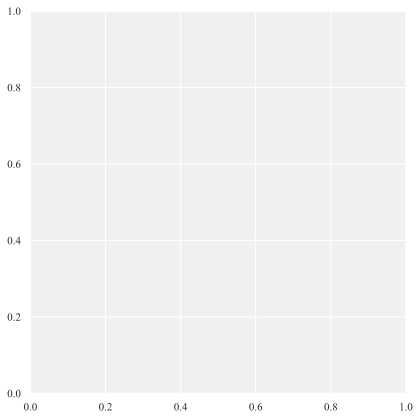

In [6]:
# Initialize color and plot settings
color = fss.Color()
fss.plot.initialize(color)

# Create a color palette for categories of chess openings
names = ["Flank", "Semi-Open", "Open & French Defense", "Closed & Semi-Closed",
         "Indian Defenses"]
colors = ["green", "yellow", "orange", "blue", "darkGreen"]
palette = color.getPalette(names, colors)

# Plot the scatterplot of the dataset showing games played vs games won for each
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data = dataset.original, 
        x = features[0], 
        y = features[1], 
        alpha = 0.5,
        hue = "ECO",
        ax = ax,
        s=20,
        palette = palette)
plt.title("Chess Openings");

In [ ]:
objectives = [fss.objective.earthMoversDistance]
parameters = {"dataset": dataset.dataArray}
lossEMDOverdraw = fss.MultiCriterion(objectives, parameters)
solver = fss.Solver(algorithm=fss.algorithm.greedySwap, loss=lossEMDOverdraw)

subset = solver.solve(dataset, subsetSize=250)
print(subset)

subset.save({directory}/"EMDOverdraw")

In [ ]:
objectives = [fss.objective.earthMoversDistance]

lossEMDOverdraw = fss.MultiCriterion(objectives)
solveMethod = fss.Solver(algorithm=fss.algorithm.greedySwap)

z, t, l = solveMethod.solve(dataset, subsetSize=250)
subset = fss.Subset(dataset, z)
print(l)

subset.save({directory}/"EMD")

In [ ]:
objectives = [fss.objective.earthMoversDistance]

lossEMDOverdraw = fss.MultiCriterion(objectives)
solveMethod = fss.Solver(algorithm=fss.algorithm.greedySwap)

z, t, l = solveMethod.solve(dataset, subsetSize=250)
subset = fss.Subset(dataset, z)
print(l)

subset.save({directory}/"Overdraw")

In [ ]:
objectives = [fss.objective.earthMoversDistance]

lossEMDOverdraw = fss.MultiCriterion(objectives)
solveMethod = fss.Solver(algorithm=fss.algorithm.greedySwap)

z, t, l = solveMethod.solve(dataset, subsetSize=250)
subset = fss.Subset(dataset, z)
print(l)

subset.save({directory}/"Random")

In [ ]:
objectives = [fss.objective.earthMoversDistance]

lossEMDOverdraw = fss.MultiCriterion(objectives)
solveMethod = fss.Solver(algorithm=fss.algorithm.greedySwap)

z, t, l = solveMethod.solve(dataset, subsetSize=250)
subset = fss.Subset(dataset, z)
print(l)

subset.save({directory}/"Non-categorical")

In [ ]:
titleSize = 16
labelSize = 14
smoothness = 0.45
levels = 5

xlimScatter = [0, 80]
ylimScatter = [-300, 23000]
ylimKDE = [0, 12500]
xlimKDE = [0, 80]

fullScatterSize = 15
smallScatterSize = 3.5

nrows=20
ncols=33

height_ratios = np.ones(nrows)
height_ratios[9] = 0.5
height_ratios[19] = 2

width_ratios = np.ones(ncols)
width_ratios[10] = 0.7
width_ratios[21] = 0.5
width_ratios[27] = 0.3

fig = plt.figure(figsize=(18, 8))
grid = GridSpec(nrows=nrows, 
                ncols=ncols, 
                figure=fig, 
                height_ratios=height_ratios, 
                width_ratios=width_ratios)

ax1 = fig.add_subplot(grid[:14, 0:10])
ax2 = fig.add_subplot(grid[:14, 11:21])

ax3 = fig.add_subplot(grid[16:, 0:2])
ax4 = fig.add_subplot(grid[16:, 2:4])
ax5 = fig.add_subplot(grid[16:, 4:6])
ax6 = fig.add_subplot(grid[16:, 6:8])
ax7 = fig.add_subplot(grid[16:, 8:10])

ax8 = fig.add_subplot(grid[16:, 11:13])
ax9 = fig.add_subplot(grid[16:, 13:15])
ax10 = fig.add_subplot(grid[16:, 15:17])
ax11 = fig.add_subplot(grid[16:, 17:19])
ax12 = fig.add_subplot(grid[16:, 19:21])

ax13 = fig.add_subplot(grid[:6, 22:27])
ax14 = fig.add_subplot(grid[:6, 28:])
ax15 = fig.add_subplot(grid[10:16, 22:27])
ax16 = fig.add_subplot(grid[10:16, 28:])

ax17 = fig.add_subplot(grid[6:8, 22])
ax18 = fig.add_subplot(grid[6:8, 23])
ax19 = fig.add_subplot(grid[6:8, 24])
ax20 = fig.add_subplot(grid[6:8, 25])
ax21 = fig.add_subplot(grid[6:8, 26])

ax22 = fig.add_subplot(grid[6:8, 28])
ax23 = fig.add_subplot(grid[6:8, 29])
ax24 = fig.add_subplot(grid[6:8, 30])
ax25 = fig.add_subplot(grid[6:8, 31])
ax26 = fig.add_subplot(grid[6:8, 32])

ax27 = fig.add_subplot(grid[16:18, 22])
ax28 = fig.add_subplot(grid[16:18, 23])
ax29 = fig.add_subplot(grid[16:18, 24])
ax30 = fig.add_subplot(grid[16:18, 25])
ax31 = fig.add_subplot(grid[16:18, 26])

ax32 = fig.add_subplot(grid[16:18, 28])
ax33 = fig.add_subplot(grid[16:18, 29])
ax34 = fig.add_subplot(grid[16:18, 30])
ax35 = fig.add_subplot(grid[16:18, 31])
ax36 = fig.add_subplot(grid[16:18, 32])

ax37 = fig.add_subplot(grid[19:, 22:])

fullScatter = sns.scatterplot(data = dataset.data, 
        x = features[0], 
        y = features[1], 
        alpha = 0.6,
        hue = "ECO",
        ax = ax1,
        s=fullScatterSize,
        palette = palette)

ax1.set_title("Chess Openings", fontsize=titleSize)
ax1.set_xlabel("Win Rate", fontsize=labelSize)
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax1.set_ylabel("Frequency Played", fontsize=labelSize)

handles, labels = ax1.get_legend_handles_labels()
modified_labels = [label.replace("&", "&\n") for label in labels]
ax1.legend(handles, modified_labels, fontsize=11, title="ECO Categories")
ax1.set_xlim(xlimScatter)
ax1.set_ylim(ylimScatter)

with open(f'../data/{saveDirectory}/size=250_obj=emdOverdrawCategorical_k=full.pkl', 'rb') as f:
    categoricalOverdrawSubset = pickle.load(f)

subsetScatter = sns.scatterplot(data = categoricalOverdrawSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        hue = "ECO",
        ax = ax2,
        s=fullScatterSize,
        palette = palette,
        edgecolor = None)

ax2.sharey(ax1)
ax2.set_ylabel(None)
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax2.set_title("Subset of Chess Openings\nCategorical Distribution without Overdraw", fontsize=titleSize)
ax2.set_xlabel("Win Rate", fontsize=labelSize)
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax2.set_ylabel(None)
subsetScatter.legend_.set_title("ECO Categories")
ax2.get_legend().remove()
ax2.set_xlim(xlimScatter)
ax2.set_ylim(ylimScatter)

eco_categories = dataset.data['ECO'].unique()
x_min, x_max = dataset.data['Player Win %'].min(), dataset.data['Player Win %'].max()
y_min, y_max = dataset.data['Num Games'].min(), dataset.data['Num Games'].max()
x_range = np.linspace(x_min, x_max, 50)
y_range = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_range, y_range)
positions = np.vstack([X.ravel(), Y.ravel()])

axs = [[ax3, ax4, ax5, ax6, ax7], [ax8, ax9, ax10, ax11, ax12]]
for i, eco_category in enumerate(eco_categories):
    for j, data in enumerate([dataset.data, categoricalOverdrawSubset.df]):
        category = data[data['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[j][i].set_facecolor(light_palette[0])
        axs[j][i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[j][i].set_xticks([])
        axs[j][i].set_yticks([])
        axs[j][i].set_xlim(xlimKDE)
        axs[j][i].set_ylim(ylimKDE)

        axs[j][i].set_xlabel(f'{eco_category.replace("&", "&")}', fontsize=8)

ax13.set_title("Subset of Chess Openings:\nRandom Subset")
randomSubset = dataset.data.sample(250)
sns.scatterplot(data = randomSubset, 
        x = features[0], 
        y = features[1], 
        alpha = 0.6,
        hue = "ECO",
        ax = ax13,
        s=smallScatterSize,
        palette = palette,
        edgecolor = None,
        legend=None)

ax13.set_xticklabels([])
ax13.set_yticklabels([])
ax13.set_xlim(xlimScatter)
ax13.set_ylim(ylimScatter)
ax13.set_xlabel(None)
ax13.set_ylabel(None)

axs = [ax17, ax18, ax19, ax20, ax21]
for i, eco_category in enumerate(eco_categories):
        category = randomSubset[randomSubset['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

ax14.set_title("Subset of Chess Openings:\nWithout Overdraw")

with open(f'../data/{saveDirectory}/subsetSize=250_Overdraw.pkl', 'rb') as f:
    overdrawSubset = pickle.load(f)

sns.scatterplot(data = overdrawSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        hue = "ECO",
        ax = ax14,
        s=smallScatterSize,
        palette = palette,
        edgecolor = None,
        legend=None)

ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.set_xlim(xlimScatter)
ax14.set_ylim(ylimScatter)
ax14.set_ylabel(None)
ax14.set_xlabel(None)

axs = [ax22, ax23, ax24, ax25, ax26]
for i, eco_category in enumerate(eco_categories):
        category = overdrawSubset.df[overdrawSubset.df['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

ax15.set_title("Subset of Chess Openings:\nOverall Distribution")
with open(f'../data/{saveDirectory}/size=250_obj=emdOverall_k=full.pkl', 'rb') as f:
    overallSubset = pickle.load(f)

sns.scatterplot(data = overallSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 1,
        ax = ax15,
        s=smallScatterSize,
        hue=0,
        palette=palette,
        edgecolor = None,
        legend=None)

ax15.set_xticklabels([])
ax15.set_yticklabels([])
ax15.set_xlim(xlimScatter)
ax15.set_ylim(ylimScatter)
ax15.set_ylabel(None)
ax15.set_xlabel(None)

axs = [ax27, ax28, ax29, ax30, ax31]
for i, eco_category in enumerate(eco_categories):
        category = overallSubset.df[overallSubset.df['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

ax16.set_title("Subset of Chess Openings:\nCategorical Distribution")
with open(f'../data/{saveDirectory}/size=250_obj=emdCategorical_k=full.pkl', 'rb') as f:
    categoricalSubset = pickle.load(f)

sns.scatterplot(data = categoricalSubset.df, 
        x = features[0], 
        y = features[1], 
        alpha = 0.6,
        hue = "ECO",
        ax = ax16,
        s=smallScatterSize,
        palette = palette,
        edgecolor = None,
        legend=None)

ax16.set_yticklabels([])
ax16.set_xticklabels([])
ax16.set_xlim(xlimScatter)
ax16.set_ylim(ylimScatter)
ax16.set_ylabel(None)
ax16.set_xlabel(None)

axs = [ax32, ax33, ax34, ax35, ax36]
for i, eco_category in enumerate(eco_categories):
        category = categoricalSubset.df[categoricalSubset.df['ECO'] == eco_category]

        dataKDE = gaussian_kde(np.vstack([category['Player Win %'], category['Num Games']]), smoothness)
        Z = np.reshape(dataKDE(positions).T, X.shape)

        color = palette[eco_category]
        light_palette = sns.light_palette(color, n_colors=levels)
        colormap = ListedColormap(light_palette)

        axs[i].set_facecolor(light_palette[0])
        axs[i].contourf(X, Y, Z, levels=levels-1, cmap=colormap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlim(xlimKDE)
        axs[i].set_ylim(ylimKDE)

subset_list = [categoricalOverdrawSubset.df, randomSubset, overdrawSubset.df, overallSubset.df, categoricalSubset.df]
subset_names = ["Categorical Distribution\nwithout Overdraw", "Random", "Without\nOverdraw", "Overall\nDistribution", "Categorical\nDistribution"]

emd_data = {'Subset': [], 'Category': [], 'EMD': []}
for i, subset in enumerate(subset_list):
    emd_losses = emdCategorical(subset, dataset.data, dataset.features, dataset.categorical, dataset.categories)
    for j, category in enumerate(dataset.categories):
        emd_data['Subset'].append(subset_names[i])
        emd_data['Category'].append(category)
        emd_data['EMD'].append(emd_losses[j])

# Create DataFrame from the emd_data dictionary
emd_df = pd.DataFrame(emd_data)

# Plot using Seaborn with the specified palette and ax
sns.barplot(x='Subset', 
            y='EMD', 
            hue='Category', 
            data=emd_df, 
            palette=palette, 
            ax=ax37,
            legend=None,
            linewidth=0)
ax37.set_xlabel(None)
ax37.set_ylabel(None)
ax37.set_title('Earth Mover\'s Distance for Each Subset')
ax37.set_xticks(subset_names)
ax37.set_xticklabels(ax37.get_xticklabels(), fontsize=8)
ax37.set_yticks([0, 2e6, 4e6, 6e6])
ax37.set_yticklabels([])

plt.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig("chess.pdf", bbox_inches="tight", format="pdf")
plt.close(fig)